**Proyecto**

### 1. Analisis Exploratorio

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomTreesEmbedding
#from sklearn.neural_network import BernoulliRBM

In [4]:
#Read data
df0 = pd.read_csv("books.csv",error_bad_lines=False)
df0.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df0.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
#Eliminar espacios de los nombres de las columnas
df0.columns = df0.columns.str.strip()

In [7]:
#Eliminar audio libros segun nuestros parametros
df = df0.loc[df0['num_pages']>=5]
df = df[~df['publisher'].str.contains("Audio",case=False)]
df = df.reset_index()

In [8]:
#Agregar columna año (de publicacion)
fechas_buenas = []
for i in range(df.shape[0]):
  fecha = df["publication_date"][i].split("/")
  fechas_buenas.append(fecha[2])
df["año"] = fechas_buenas

In [9]:
#Ver Idiomas
np.unique(df["language_code"])

array(['ale', 'ara', 'en-CA', 'en-GB', 'en-US', 'eng', 'enm', 'fre',
       'ger', 'gla', 'glg', 'grc', 'ita', 'jpn', 'lat', 'msa', 'mul',
       'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur', 'wel',
       'zho'], dtype=object)

In [10]:
#Unificar ingles
df.loc[df["language_code"]=="en-CA","language_code"] = "eng"
df.loc[df["language_code"]=="en-GB","language_code"] = "eng"
df.loc[df["language_code"]=="en-US","language_code"] = "eng"
np.unique(df["language_code"])

array(['ale', 'ara', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc',
       'ita', 'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus',
       'spa', 'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

In [11]:
df.head()

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,año
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [12]:
df.describe()

,index,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10894.000000,10894.000000,10894.000000,1.089400e+04,10894.000000,1.089400e+04,10894.000000
mean,5563.496604,21322.944465,3.932981,9.759434e+12,343.070956,1.825570e+04,550.351386
std,3217.843280,13121.007365,0.351133,4.475971e+11,238.814227,1.135803e+05,2592.920915
min,0.000000,1.000000,0.000000,8.987060e+09,5.000000,0.000000e+00,0.000000
25%,2772.250000,10232.250000,3.770000,9.780345e+12,200.000000,1.130000e+02,9.000000
50%,5550.500000,20238.500000,3.960000,9.780571e+12,304.000000,7.895000e+02,48.000000
75%,8355.750000,32135.250000,4.130000,9.780871e+12,416.000000,5.160000e+03,245.000000
max,11122.000000,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


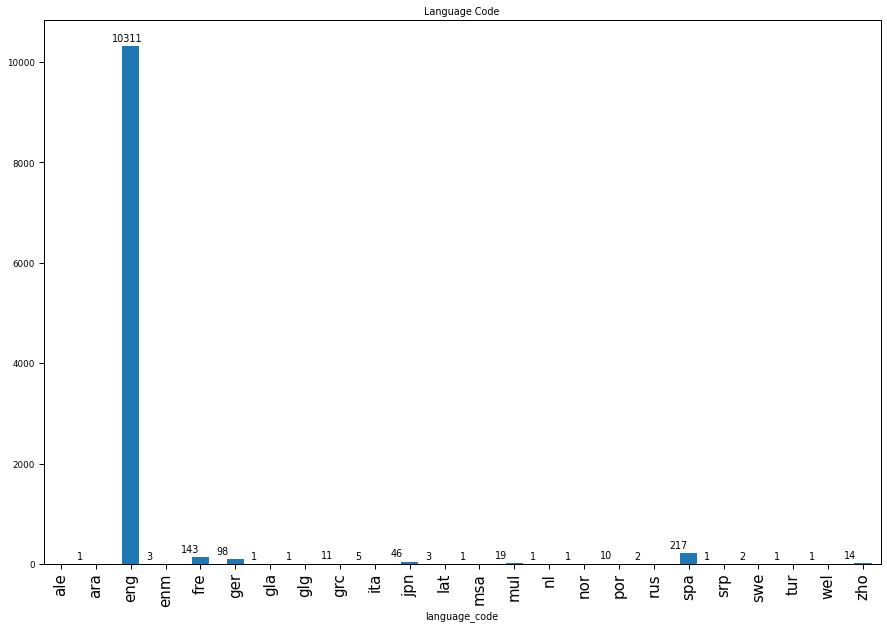

In [13]:
#Grafico libros por idioma
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

<Figure size 1080x720 with 0 Axes>

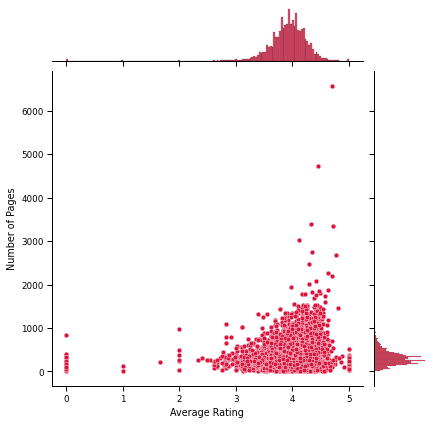

In [14]:
#Grafico de numero de paginas vs nota promedio
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [15]:
# Funcion para identificar el primer autor
def primer_autor(text):
    arr = text.split('/')
    return arr[0]

In [16]:
#Agregar columna primer autor
df['primer_autor'] = df['authors'].apply(lambda x : primer_autor(x))
total_rating = df.drop_duplicates(subset=['primer_autor', 'title'], keep='first')
total_rating = total_rating.groupby(by=['primer_autor']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating

,primer_autor,total_rating
3741,Stephen King,216.58
4148,William Shakespeare,178.45
2996,P.G. Wodehouse,170.11
1597,J.R.R. Tolkien,163.53
3526,Rumiko Takahashi,163.28
...,...,...
146,Andrew Hunt,0.00
1237,Frank N. Magill,0.00
3374,Robert A. Weiss,0.00
1256,Frederick P. Lenz,0.00


In [17]:
#Se agrupa por autor en orden descendente segun libros escritos
total_book = df.groupby(by=['primer_autor']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book

,primer_autor,total_book
3741,Stephen King,54
4148,William Shakespeare,45
2996,P.G. Wodehouse,41
1684,James Patterson,40
2721,Mercedes Lackey,40
...,...,...
1723,Jane Robins,1
1725,Jane Walmsley,1
1726,Jane Werner Watson,1
1727,Jane Yolen,1


In [18]:
#Parametro adjusted_rating mas "equilibrado" considerando cantidad de libros y sus puntuaciones promedio
avg_author = pd.merge(total_book, total_rating, on='primer_autor', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] >0]
avg_author['adjusted_rating'] = avg_author['average_rating']*(avg_author['total_book']+20*avg_author['total_book'].mean())/20*avg_author['total_book'].mean()
avg_author = avg_author.sort_values(by=['adjusted_rating'], ascending=False)
avg_author.head(10)

,primer_autor,total_book,total_rating,average_rating,adjusted_rating
0,Stephen King,54,216.58,4.01,50.372282
2,P.G. Wodehouse,41,170.11,4.15,45.541877
1,William Shakespeare,45,178.45,3.97,45.506028
5,J.R.R. Tolkien,39,163.53,4.19,44.957366
6,Rumiko Takahashi,39,163.28,4.19,44.957366
4,Mercedes Lackey,40,160.11,4.00,43.407256
3,James Patterson,40,155.89,3.90,42.322074
18,Hiromu Arakawa,26,118.42,4.55,41.595925
10,C.S. Lewis,31,129.70,4.18,40.765965
12,Terry Pratchett,31,127.55,4.11,40.083281


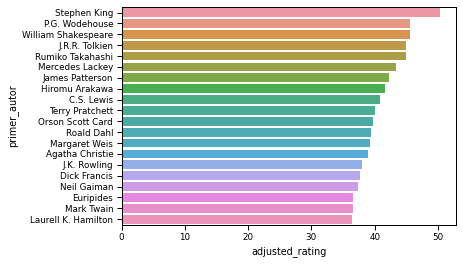

In [19]:
#Grafico mejores autores segund adjusted_rating
sns.barplot(
    y = "primer_autor",
    x = "adjusted_rating",
    data = avg_author.head(20)
)

In [20]:
#DataFrame con autores por año
aux = df.groupby("año")
df_años = aux["authors"].count().reset_index()
df_años

,año,authors
0,1900,1
1,1913,1
2,1914,1
3,1919,1
4,1921,2
...,...,...
82,2016,5
83,2017,7
84,2018,5
85,2019,6


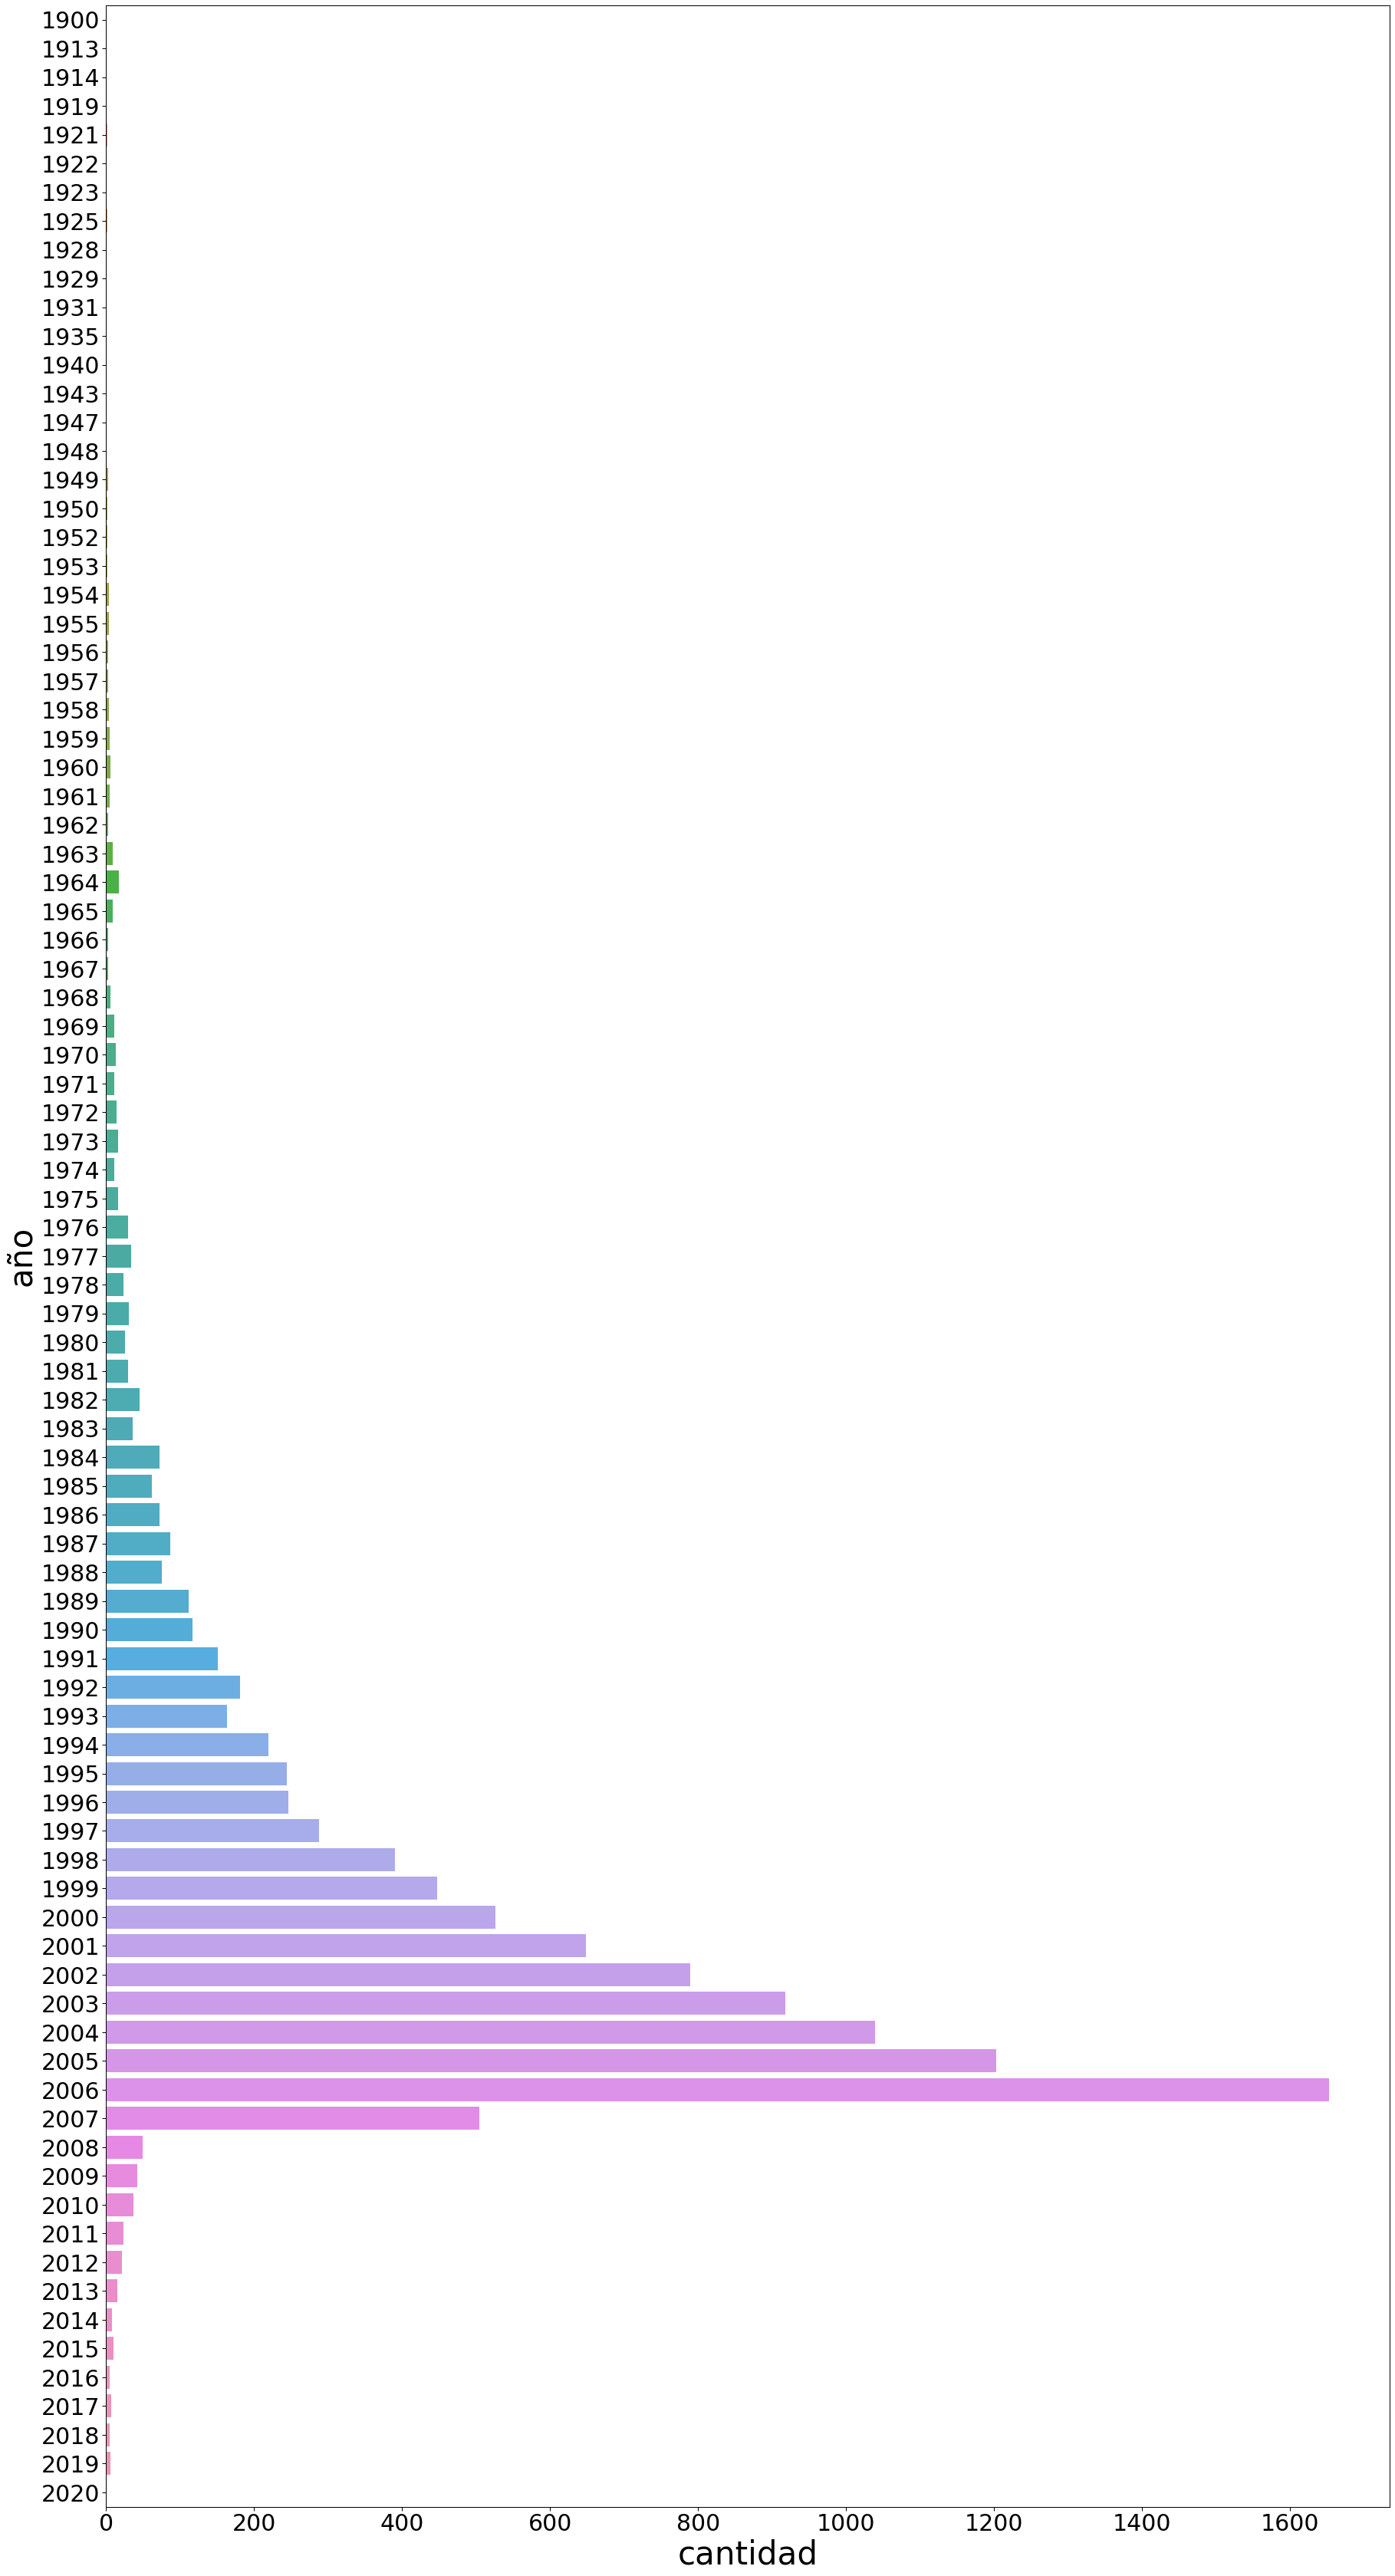

In [21]:
#Grafico autores por año
fig = plt.figure( figsize= (30,60))
sns.barplot(
    y = "año",
    x = "authors",
    data = df_años
)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("cantidad",fontsize = 42)
plt.ylabel("año",fontsize = 42)
plt.show()

### 2.1 Preprocesamiento

In [22]:
#Tomamos los datos numericos y los estandarizamos
df_numerico = df[["average_rating","año","num_pages","text_reviews_count","ratings_count"]]
scaler = StandardScaler()
df_numerico = pd.DataFrame(scaler.fit_transform(df_numerico),columns = ["average_rating","año","num_pages","text_reviews_count","ratings_count"])
df_numerico.head()

,average_rating,año,num_pages,text_reviews_count,ratings_count
0,1.814268,0.709988,1.293655,10.429122,18.291291
1,1.586424,0.468391,2.206540,11.057786,18.797362
2,1.387059,0.347592,0.037391,-0.118155,-0.104976
3,1.785788,0.468391,0.384957,13.797679,20.438726
4,2.412360,0.468391,9.827877,-0.149009,0.204026


In [23]:
#Get_Dummies para la columna idioma
df_cat = df[["language_code"]]
df_cat = pd.get_dummies(df_cat)
df_cat

,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_gla,language_code_glg,language_code_grc,language_code_ita,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10890,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10892,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Unimos df con datos numericos estandarizados con las columnas (ahora numericas) del idioma
df_procesado = pd.concat([df_numerico,df_cat],axis=1)
df_procesado

,average_rating,año,num_pages,text_reviews_count,ratings_count,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,1.814268,0.709988,1.293655,10.429122,18.291291,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.586424,0.468391,2.206540,11.057786,18.797362,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.387059,0.347592,0.037391,-0.118155,-0.104976,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.785788,0.468391,0.384957,13.797679,20.438726,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.412360,0.468391,9.827877,-0.149009,0.204026,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,0.361759,0.468391,0.707398,-0.204548,-0.159363,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10890,0.418720,-1.464385,1.222467,-0.190663,-0.153843,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10891,0.076953,-0.860393,0.301206,-0.175621,-0.153517,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10892,-0.606581,0.830786,0.380770,-0.158651,-0.153966,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 NearestNeighbors 

In [27]:
#Creamos modelo vecinos mas cercanos (5)
model = NearestNeighbors(n_neighbors = 6)
fit_model = model.fit(df_procesado)
distance, indices = fit_model.kneighbors(df_procesado)


In [26]:
#Recomendador
id = 0
print(df["title"][id])
print("Se recomienda leer: ")
for e in indices[id]:
  if(e != id):
    print(df["title"][e])

Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Se recomienda leer: 
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Animal Farm
Lord of the Flies
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
